In [1]:
import matplotlib.pyplot as plt

In [2]:
def c_ode_2(
    f1: callable,
    f2: callable,
    x_get: float,
    x0: float,
    y0: float,
    z0: float,
    h: float = 0.01
):
    """Solves a coupled ODE system of two equations.

    Args:
        f1 (callable): First function to be integrated.
        f2 (callable): Second function to be integrated.
        x_get (float): Final x value.
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        z0 (float): Initial z value.
        h (float, optional): Step size.. Defaults to 0.01.

    Returns:
        X, Y, Z: Approximate solutions to the ODE system.
    """

    xs, ys, zs = [x0], [y0], [z0]
    i = 0
    while x0 <= x_get:
        i+=1
        k1y = h * f1(x0, y0, z0)
        k1z = h * f2(x0, y0, z0)

        k2y = h * f1(x0 + h/2, y0 + k1y/2, z0 + k1z/2)
        k2z = h * f2(x0 + h/2, y0 + k1y/2, z0 + k1z/2)

        k3y = h * f1(x0 + h/2, y0 + k2y/2, z0 + k2z/2)
        k3z = h * f2(x0 + h/2, y0 + k2y/2, z0 + k2z/2)

        k4y = h * f1(x0 + h, y0 + k3y, z0 + k3z)
        k4z = h * f2(x0 + h, y0 + k3y, z0 + k3z)

        x0 = x0+h
        y0 += (1/6)*(k1y+2*k2y+2*k3y+k4y)
        z0 += (1/6)*(k1z+2*k2z+2*k3z+k4z)
        xs.append(x0)
        ys.append(y0)
        zs.append(z0)
        
        # print([x0, y0, z0])
        # print(f"[[{k1y}, {k1z}], [{k2y}, {k2z}], [{k3y}, {k3z}], [{k4y}, {k4z}]]\n")
        
        # if i == 5: break

    return xs, ys, zs

In [3]:
def c_ode(funcs, var, x_get, h=0.01):
    """Solves a coupled ODE system of n equations.

    Args:
        funcs (list[callable, ...]): Functions to be integrated.
        var (iterable[float, ...]): Initial values of the variables.
        x_get (float): Final x value.
        h (float, optional): Step size.. Defaults to 0.01.

    Raises:
        ValueError: If the number of functions is not 1 less than the number of variables.

    Returns:
        evol (2D list of shape (len(var), i)): Approximate solutions to the ODE system. [i is the number of iterations taken]
    """
    if len(funcs) + 1 != len(var):
        raise ValueError(f"Number of functions must be one less than number of variables. FYI: ({len(funcs) = }) + 1 = {len(funcs)+1} != ({len(var) = })")
    evol = [[var_i] for var_i in var]
    k = [[None for _ in range(len(funcs))] for __ in range(4)]
    count = 0
    while var[0] <= x_get:
        count += 1
        k[0] = [h * funcs[i](*var) for i in range(len(funcs))]
        k[1] = [h * funcs[i](var[0] + h/2, *(var[j] + k[0][j-1]/2 for j in range(1, len(var)))) for i in range(len(funcs))]
        k[2] = [h * funcs[i](var[0] + h/2, *(var[j] + k[1][j-1]/2 for j in range(1, len(var)))) for i in range(len(funcs))]
        k[3] = [h * funcs[i](var[0] + h, *(var[j] + k[2][j-1] for j in range(1, len(var)))) for i in range(len(funcs))]
        var[0] += h
        evol[0].append(var[0])
        for i in range(1, len(var)):
            var[i] += (1/6)*(k[0][i-1]+2*k[1][i-1]+2*k[2][i-1]+k[3][i-1])
            evol[i].append(var[i])
    return evol

In [4]:
gamma = 0.2
omega = 1.2
def dydt(t, y, z): return z
def dzdt(t, y, z): return -y-(gamma*z)/2
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

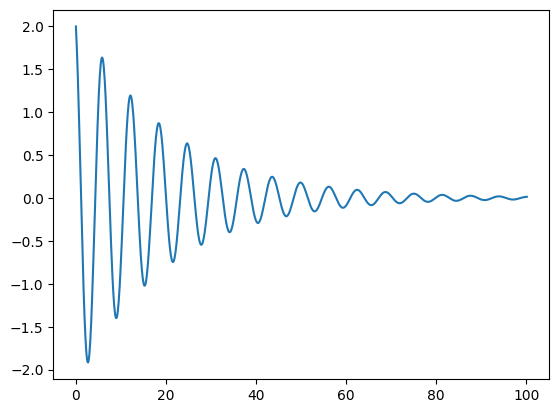

In [5]:
ts, ys, zs = c_ode([dydt, dzdt], [t_0, y_0, z_0], 100, h)
plt.plot(ts, ys, label="y")